In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
data = pd.read_csv("/workspaces/Applied-Predictive-Modeling/data/segmentationOriginal.csv")
data

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,210948219,Train,PS,85.481047,0,302,0,42.041522,23.467128,143.532872,...,26.648000,102.644041,138.501314,0,0,0,24.979033,1,208,379
2015,210952142,Test,PS,99.049010,0,607,0,38.803448,20.587931,78.372414,...,28.429877,76.190478,119.199303,0,0,0,24.524072,1,313,88
2016,210952338,Test,PS,83.319801,0,204,0,37.866667,5.994872,59.789744,...,24.139396,37.024343,63.198797,0,2,2,9.985410,2,291,402
2017,210948231,Test,WS,116.473894,0,390,0,45.643432,169.123324,147.498660,...,37.641158,154.151167,330.195989,0,0,0,22.440286,1,100,448


In [24]:
seg_data = data[data["Case"] == 'Train']
seg_data = seg_data.iloc[:, 3:]
cellid = data[['Cell']]
classid = data[['Class']]
caseid = data[['Case']]

seg_data

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,AvgIntenStatusCh3,AvgIntenStatusCh4,ConvexHullAreaRatioCh1,ConvexHullAreaRatioStatusCh1,ConvexHullPerimRatioCh1,ConvexHullPerimRatioStatusCh1,DiffIntenDensityCh1,DiffIntenDensityCh3,DiffIntenDensityCh4,DiffIntenDensityStatusCh1,DiffIntenDensityStatusCh3,DiffIntenDensityStatusCh4,EntropyIntenCh1,EntropyIntenCh3,EntropyIntenCh4,EntropyIntenStatusCh1,EntropyIntenStatusCh3,EntropyIntenStatusCh4,EqCircDiamCh1,EqCircDiamStatusCh1,EqEllipseLWRCh1,EqEllipseLWRStatusCh1,EqEllipseOblateVolCh1,EqEllipseOblateVolStatusCh1,EqEllipseProlateVolCh1,EqEllipseProlateVolStatusCh1,EqSphereAreaCh1,EqSphereAreaStatusCh1,EqSphereVolCh1,EqSphereVolStatusCh1,FiberAlign2Ch3,FiberAlign2Ch4,FiberAlign2StatusCh3,FiberAlign2StatusCh4,FiberLengthCh1,FiberLengthStatusCh1,FiberWidthCh1,FiberWidthStatusCh1,IntenCoocASMCh3,IntenCoocASMCh4,IntenCoocASMStatusCh3,IntenCoocASMStatusCh4,IntenCoocContrastCh3,IntenCoocContrastCh4,IntenCoocContrastStatusCh3,IntenCoocContrastStatusCh4,IntenCoocEntropyCh3,IntenCoocEntropyCh4,IntenCoocEntropyStatusCh3,IntenCoocEntropyStatusCh4,IntenCoocMaxCh3,IntenCoocMaxCh4,IntenCoocMaxStatusCh3,IntenCoocMaxStatusCh4,KurtIntenCh1,KurtIntenCh3,KurtIntenCh4,KurtIntenStatusCh1,KurtIntenStatusCh3,KurtIntenStatusCh4,LengthCh1,LengthStatusCh1,MemberAvgAvgIntenStatusCh2,MemberAvgTotalIntenStatusCh2,NeighborAvgDistCh1,NeighborAvgDistStatusCh1,NeighborMinDistCh1,NeighborMinDistStatusCh1,NeighborVarDistCh1,NeighborVarDistStatusCh1,PerimCh1,PerimStatusCh1,ShapeBFRCh1,ShapeBFRStatusCh1,ShapeLWRCh1,ShapeLWRStatusCh1,ShapeP2ACh1,ShapeP2AStatusCh1,SkewIntenCh1,SkewIntenCh3,SkewIntenCh4,SkewIntenStatusCh1,SkewIntenStatusCh3,SkewIntenStatusCh4,SpotFiberCountCh3,SpotFiberCountCh4,SpotFiberCountStatusCh3,SpotFiberCountStatusCh4,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,TotalIntenStatusCh1,TotalIntenStatusCh2,TotalIntenStatusCh3,TotalIntenStatusCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,0,0,1.263158,1,0.797080,2,31.875000,43.122283,79.308424,0,0,0,6.087592,6.642761,7.880155,0,1,1,32.305584,1,1.558394,0,2232.905485,1,1432.824568,1,3278.725624,1,17653.524531,1,0.487935,0.352374,0,0,64.282302,1,13.167079,0,0.028051,0.012595,0,0,8.227953,6.984046,0,0,6.822138,7.098988,0,0,0.153215,0.073871,0,0,-0.248769,-0.330784,-0.265264,0,0,0,47.218548,1,0,0,174.444157,2,30.111141,0,81.380633,2,154.898761,1,0.539758,2,1.468181,0,2.255810,0,0.398705,0.619731,0.527263,0,0,0,4,11,1,1,24964,160997,54675,128368,0,1,1,1,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,0,0,1.053310,0,0.935475,0,32.487710,35.985770,51.357050,0,0,0,5.883557,6.683000,7.144601,0,1,0,23.448919,0,1.375386,0,802.194544,0,583.250400,0,1727.410431,0,6750.984640,0,0.300522,0.522316,0,0,21.141150,0,21.141150,1,0.006862,0.006142,0,0,14.446074,16.700843,0,1,7.580100,7.671478,1,1,0.028351,0.023196,2,2,-0.293485,1.051281,0.150614,0,0,0,28.143031,0,0,0,158.477377,2,34.944765,0,90.437683,2,84.564598,0,0.724312,1,1.328408,0,1.272193,0,0.472487,0.971379,0.324707,0,0,0,2,6,0,0,11552,47510,26344,43959,0,0,0,0,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,0,0,2,1.202625,0,0.865829,2,26.732283,22.917323,26.393701,2,0,2,5.420065,5.436732,5.778329,2,0,0,19.502786,0,3.391220,1,724.714310,0,213.703111,0,1194.931973,0,3884.083751,0,0.220424,0.733250,0,1,43.141123,0,7.404412,2,0.030962,0.011033,0,0,7.299457,13.390884,0,1,6.312641,7.197026,0,0,0.162791,0.077519,0,0,0.625856,0.127741,-0.347294,0,0,0,37.859574,0,0,0,206.334369,0,33.080298,0,116.892757,0,101.091070,0,0.589163,0,2.826854,1,2.545840,1,0.881671,0.999893,0.604440,1,0,0,4,7,1,0,5545,28869,8042,8843,0,0,0,2,13.818968,30.005

In [26]:
# finding columns that contain "Status" in their name
status_cols = [col for col in seg_data.columns if "Status" in col]
# dropping them
seg_data = seg_data.drop(columns=status_cols)

seg_data

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,DiffIntenDensityCh3,DiffIntenDensityCh4,EntropyIntenCh1,EntropyIntenCh3,EntropyIntenCh4,EqCircDiamCh1,EqEllipseLWRCh1,EqEllipseOblateVolCh1,EqEllipseProlateVolCh1,EqSphereAreaCh1,EqSphereVolCh1,FiberAlign2Ch3,FiberAlign2Ch4,FiberLengthCh1,FiberWidthCh1,IntenCoocASMCh3,IntenCoocASMCh4,IntenCoocContrastCh3,IntenCoocContrastCh4,IntenCoocEntropyCh3,IntenCoocEntropyCh4,IntenCoocMaxCh3,IntenCoocMaxCh4,KurtIntenCh1,KurtIntenCh3,KurtIntenCh4,LengthCh1,NeighborAvgDistCh1,NeighborMinDistCh1,NeighborVarDistCh1,PerimCh1,ShapeBFRCh1,ShapeLWRCh1,ShapeP2ACh1,SkewIntenCh1,SkewIntenCh3,SkewIntenCh4,SpotFiberCountCh3,SpotFiberCountCh4,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
1,133.752037,819,31.923274,205.878517,69.916880,164.153453,1.263158,0.797080,31.875000,43.122283,79.308424,6.087592,6.642761,7.880155,32.305584,1.558394,2232.905485,1432.824568,3278.725624,17653.524531,0.487935,0.352374,64.282302,13.167079,0.028051,0.012595,8.227953,6.984046,6.822138,7.098988,0.153215,0.073871,-0.248769,-0.330784,-0.265264,47.218548,174.444157,30.111141,81.380633,154.898761,0.539758,1.468181,2.255810,0.398705,0.619731,0.527263,4,11,24964,160997,54675,128368,18.809225,56.715352,118.388139,32.161261,215,347
2,106.646387,431,28.038835,115.315534,63.941748,106.696602,1.053310,0.935475,32.487710,35.985770,51.357050,5.883557,6.683000,7.144601,23.448919,1.375386,802.194544,583.250400,1727.410431,6750.984640,0.300522,0.522316,21.141150,21.141150,0.006862,0.006142,14.446074,16.700843,7.580100,7.671478,0.028351,0.023196,-0.293485,1.051281,0.150614,28.143031,158.477377,34.944765,90.437683,84.564598,0.724312,1.328408,1.272193,0.472487,0.971379,0.324707,2,6,11552,47510,26344,43959,17.295643,37.671053,49.470524,21.185525,371,252
3,69.150325,298,19.456140,101.294737,28.217544,31.028070,1.202625,0.865829,26.732283,22.917323,26.393701,5.420065,5.436732,5.778329,19.502786,3.391220,724.714310,213.703111,1194.931973,3884.083751,0.220424,0.733250,43.141123,7.404412,0.030962,0.011033,7.299457,13.390884,6.312641,7.197026,0.162791,0.077519,0.625856,0.127741,-0.347294,37.859574,206.334369,33.080298,116.892757,101.091070,0.589163,2.826854,2.545840,0.881671,0.999893,0.604440,4,7,5545,28869,8042,8843,13.818968,30.005643,24.749537,13.392830,487,295
11,109.416426,256,18.828571,125.938776,13.600000,46.800000,1.081871,0.920460,28.020045,14.870824,32.697105,5.383272,4.151183,6.194035,18.082450,1.378748,368.309653,267.133437,1027.222222,3095.782368,0.364236,0.480869,22.297434,12.057876,0.108161,0.009952,6.160585,10.590685,5.044067,7.126900,0.315315,0.058559,-0.364691,1.083333,-0.626270,23.055468,263.634513,38.430378,88.504106,68.710620,0.634791,1.313937,1.397364,0.546737,1.432363,0.703801,0,5,4613,30855,3332,11466,13.922937,18.643027,40.331747,17.546861,211,495
14,104.278654,258,17.570850,124.368421,22.461538,71.206478,1.075728,0.931300,27.876106,16.119469,36.185841,5.184278,5.486225,6.624639,18.156106,1.616053,403.640528,249.769380,1035.607710,3133.767164,0.359418,0.244308,26.528557,10.174239,0.013035,0.008963,9.402056,10.301528,6.957487,7.144784,0.073913,0.034783,-0.556261,-0.512319,-0.647158,26.319604,231.152945,29.848920,103.458121,73.405592,0.557002,1.490323,1.588658,0.443092,0.555675,0.137225,1,4,4340,30719,5548,17588,12.324971,17.747143,41.928533,17.660339,172,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,174.682654,431,149.172330,207.817961,157.757282,193.966019,1.020190,0.976251,68.651282,75.569231,109.200000,7.152352,6.994814,6.620851,23.448919,1.109264,720.418514,649.456224,1727.410431,6750.984640,0.123590,0.154230,19.825008,19.825008,0.027180,0.052404,6.054882,7.020089,6.676

### Transformation

In [36]:
# checking skewness

from scipy.stats import skew

round(skew(seg_data['AngleCh1']),4)

np.float64(-0.0243)

In [40]:
#for all
round(seg_data.apply(skew),4)

AngleCh1                   -0.0243
AreaCh1                     3.5304
AvgIntenCh1                 2.9636
AvgIntenCh2                 0.8494
AvgIntenCh3                 2.2056
AvgIntenCh4                 1.9033
ConvexHullAreaRatioCh1      2.4803
ConvexHullPerimRatioCh1    -1.3060
DiffIntenDensityCh1         2.7646
DiffIntenDensityCh3         2.0883
DiffIntenDensityCh4         1.9021
EntropyIntenCh1             0.3985
EntropyIntenCh3            -1.0044
EntropyIntenCh4            -0.8291
EqCircDiamCh1               1.9584
EqEllipseLWRCh1             2.6980
EqEllipseOblateVolCh1       5.4975
EqEllipseProlateVolCh1      6.0799
EqSphereAreaCh1             3.5304
EqSphereVolCh1              5.7480
FiberAlign2Ch3             -0.0852
FiberAlign2Ch4             -0.1086
FiberLengthCh1              2.3416
FiberWidthCh1               1.1101
IntenCoocASMCh3             2.4203
IntenCoocASMCh4             2.5155
IntenCoocContrastCh3        1.6524
IntenCoocContrastCh4        3.4755
IntenCoocEntropyCh3 

### Histograms

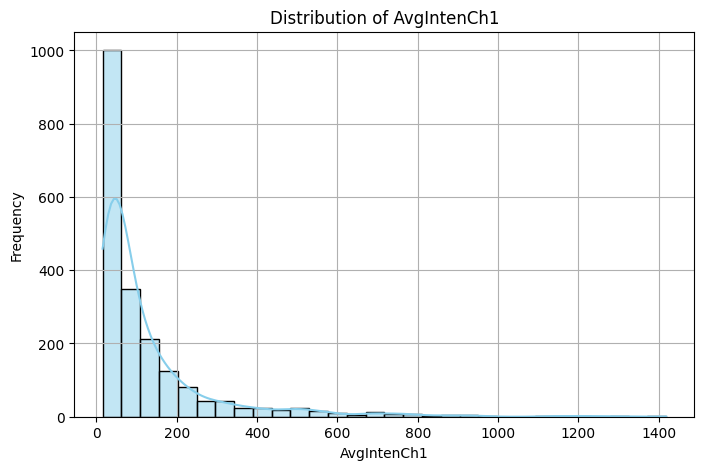

In [42]:
col = 'AvgIntenCh1'

plt.figure(figsize=(8, 5))
sns.histplot(data[col], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()